In [1]:
# mengimport library yang dibutuhkan
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image
import matplotlib.patches as mpatches
import folium

In [4]:
# membaca dan menampilkan dataset yang berbentuk csv
data= pd.read_csv('london_crime_by_lsoa.csv')
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
data.info() # digunakan untuk mengetahui tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
data.shape # digunakan untuk mengetahui dimensi data

(13490604, 7)

In [7]:
data.drop(['minor_category','month'], axis=1, inplace=True) # menghapus kolom major_category dan month

In [8]:
data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
value             0
year              0
dtype: int64

In [9]:
data.isna().sum()

lsoa_code         0
borough           0
major_category    0
value             0
year              0
dtype: int64

In [10]:
data.describe()

,value,year
count,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03
std,1.771513e+00,2.581989e+00
min,0.000000e+00,2.008000e+03
25%,0.000000e+00,2.010000e+03
50%,0.000000e+00,2.012000e+03
75%,1.000000e+00,2.014000e+03
max,3.090000e+02,2.016000e+03


# Bagaimana kasus kejahatan yang terjadi di London ?

In [11]:
# membuat dataframe dengan index berupa year dan kolom berupa jenis kejahatan yang terjadi
table = data.pivot_table(values='value',
                        index=['year'],
                        columns=['major_category'],
                        aggfunc=np.sum,
                        fill_value=0)
table

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


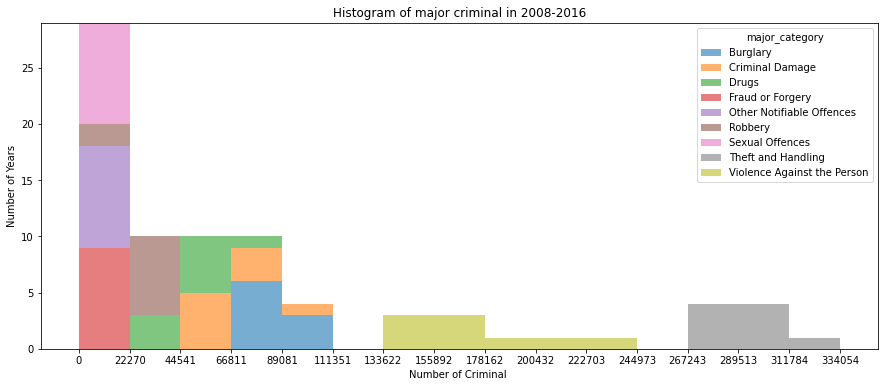

In [12]:
# membuat histogram jenis kejahatan yang terjadi di london pada tahun 2008-2016
count, bin_edges = np.histogram(table, 15)
table.plot(kind='hist',
           figsize=(15, 6),
           bins=15,
           alpha=0.6,
           stacked=True,
           xticks=bin_edges
           )

# judul histogram
plt.title('Histogram of major criminal in 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal ')

plt.show()

# Bagaimana kecenderungan kasus kejahatan di 5 wilayah paling tidak aman?

In [13]:
# mengetahui jumlah kejadian kejahatan berdasarkan wilayah/kota di London
borough= data.groupby(['borough'])[['value']].agg('sum')

# Mengetahui 5 wilayah/kota di London yang paling sering terjadi kejahatan
borough.sort_values(
    by="value",
    ascending=False
).head()

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [14]:
table2 = data.pivot_table(values='value',
                        index=['year'],
                        columns=['borough'],
                        aggfunc=np.sum,
                        fill_value=0)

# membuat dataframe sesuai wilayah
top1= table2['Westminster']
top2= table2['Lambeth']
top3= table2['Southwark']
top4= table2['Camden']
top5= table2['Newham']

# menggabungkan 5 dataframe
top= [top1, top2, top3, top4, top5] 
topborough= pd.concat(top, join='outer', axis=1).fillna(0)
topborough.index.name=None
topborough

,Westminster,Lambeth,Southwark,Camden,Newham
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


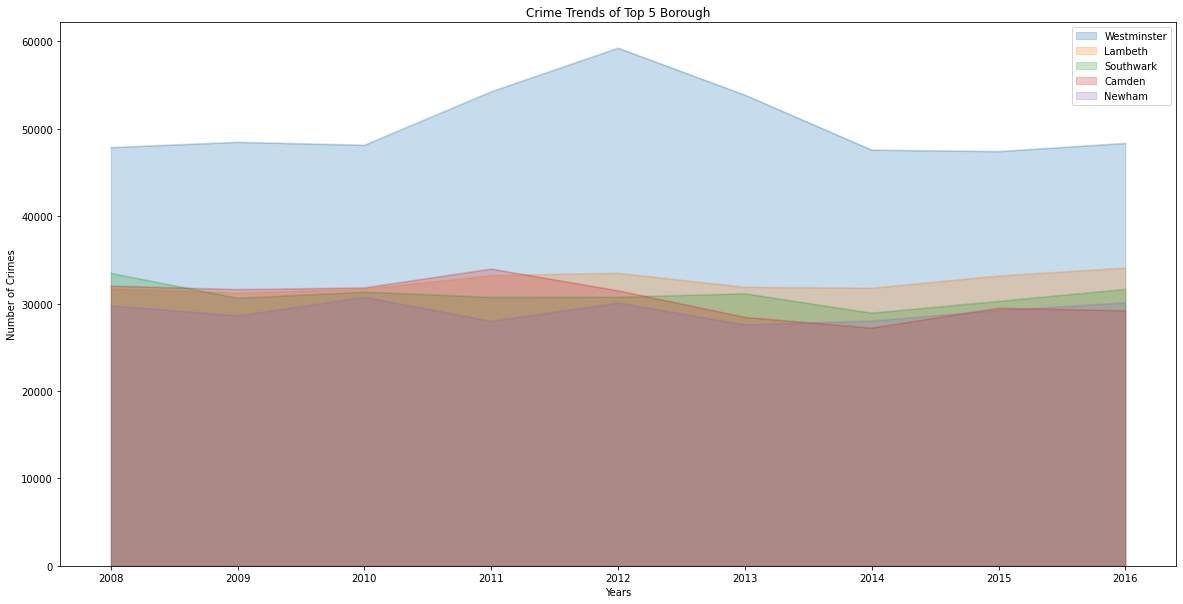

In [15]:
# membuat grafik jumlah kejadian kejahatan di 5 wilayah Lomdon tahun 2008-2016

topborough.plot(kind='area',
            alpha=0.25,
            figsize=(20,10),
            stacked=False
            )
plt.title('Crime Trends of Top 5 Borough')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

plt.show()

# Wilayah kepolisian mana yang harus diperketat keamananya di Westminster? 

In [16]:
# menampilkan data di wilayah Westminster
westminster=data[data['borough']=='Westminster']

# mengetahui jumlah kejadian kejahatan di Westminster berdasarkan wilayah kepolisisan
lsoa= westminster.groupby(['lsoa_code'])[['value']].agg('sum')

# Mengetahui 5 wilayah/kota di London yang paling sering terjadi kejahatan
lsoa10= lsoa.sort_values(
        by="value",
        ascending=False
        ).head(10)

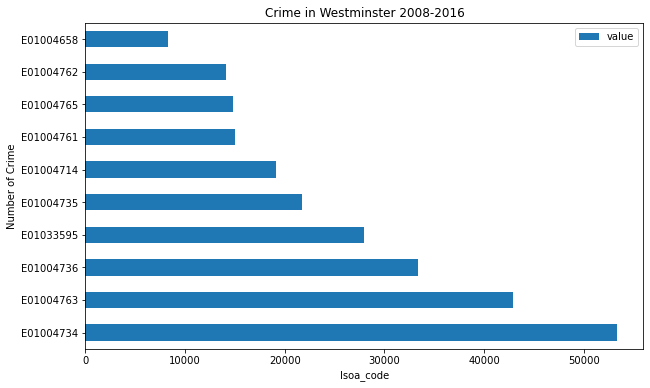

In [17]:
# diagram batang jumlah kejadian kejahatan di wilayah kepolisian Westminster tahun 2008-2016
lsoa10.plot(kind='barh', figsize= (10, 6), rot= 0)

plt.xlabel('lsoa_code')
plt.ylabel('Number of Crime')
plt.title('Crime in Westminster 2008-2016')

plt.show()

# Bagaimana proporsi kejahatan di Westminster E01004734?

In [18]:
toplsoa= westminster[westminster['lsoa_code']=='E01004734']

# mengetahui jumlah kejadian kejahatan di Westminster E01004734 berdasarkan major_category
major= toplsoa.groupby(['major_category'])[['value']].agg('sum')

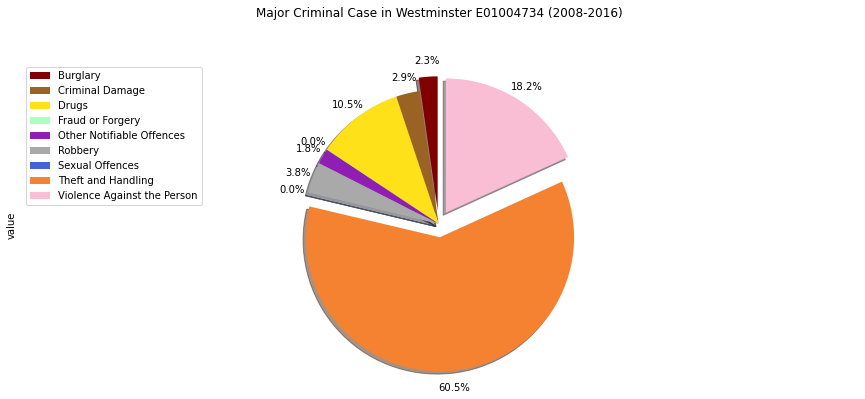

In [19]:
# memilih warna untuk masing-masing kategori kejahatan
colors_list = ['#800000', '#9A6324', '#ffe119',
               '#aaffc3', '#911eb4', '#a9a9a9',
               '#4363d8', '#f58231', '#fabed4']

# mengatur tampilan pie
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

major['value'].plot(kind='pie',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               labels=None,
               colors=colors_list,
               pctdistance=1.12,
               explode=explode_list)

# skala judul
plt.title('Major Criminal Case in Westminster E01004734 (2008-2016)', y=1.12)

plt.axis('equal')
plt.legend(labels=major.index, loc='upper left')

plt.show()

# Bagaimana perbandingan jumlah kejadian tiap tahun antara Theft and Handling dan Violence Against the Person?

In [20]:
table3 = toplsoa.pivot_table(values='value',
                        index=['major_category'],
                        columns=['year'],
                        aggfunc=np.sum,
                        fill_value=0)

# membuat dataframe sesuai kategori kejahatan
Theft= table3.loc['Theft and Handling'].transpose()
violence= table3.loc['Violence Against the Person'].transpose()

crime1= pd.DataFrame(Theft)
crime1_scatter = crime1.reset_index()
crime2= pd.DataFrame(violence)
crime2_scatter = crime2.reset_index()

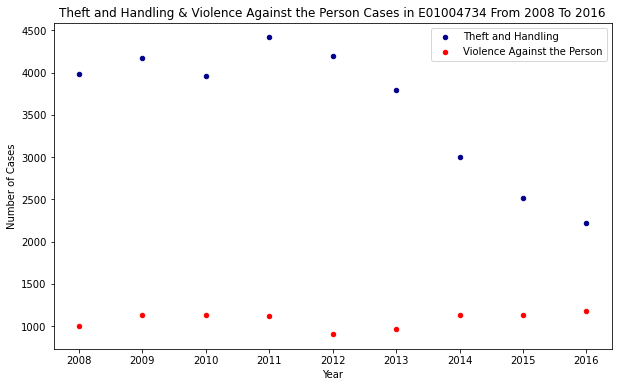

In [21]:
# membuat scatter plot
ax1 = crime1_scatter.plot(kind='scatter',
                         x='year',
                         y='Theft and Handling',
                         figsize=(10, 6),
                         color='darkblue',
                         label='Theft and Handling')

ax2 = crime2_scatter.plot(kind='scatter',
                         x='year',
                         y='Violence Against the Person',
                         figsize=(10, 6),
                         color='red',
                         label='Violence Against the Person',
                         ax=ax1)

plt.title('Theft and Handling & Violence Against the Person Cases in E01004734 From 2008 To 2016')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

# Bagaimana data kasus Theft and Handling di E01004734

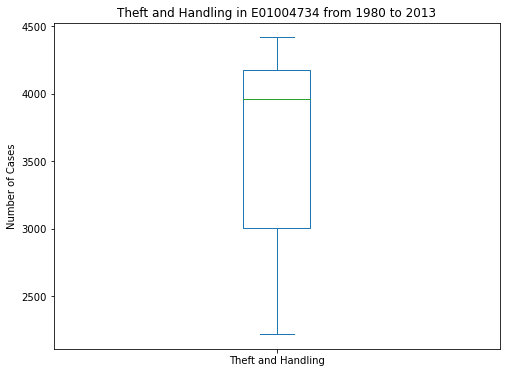

In [22]:
crime1.plot(kind='box', figsize=(8, 6))
plt.title('Theft and Handling in E01004734 from 1980 to 2013')
plt.ylabel('Number of Cases')

plt.show()

# Implementasi Wordcloud

In [23]:
# membuat dataframe dengan index berupa borough dan kolom berupa year
table2 = data.pivot_table(values='value',
                        index=['borough'],
                        columns=['year'],
                        aggfunc=np.sum,
                        fill_value=0)
# add total column
table2['Total']= table2.sum(axis=1)

In [24]:
total_value= table2['Total'].sum()
total_value

6447758

In [25]:
max_words= 90
word_string=''
for borough in table2.index.values:
    # check if country's name is single-word name
    if len(borough.split(' '))==1:
        repeat_num_times= int(table2.loc[borough,
                                        'Total']/float(total_value)*max_words)
        word_string= word_string+ ((borough+' ')* repeat_num_times)
    
# display the generated text
word_string

'Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Harrow Havering Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Sutton Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster '

In [27]:
# Step 2: import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

alice_mask= np.array(Image.open('alice_mask.png'))

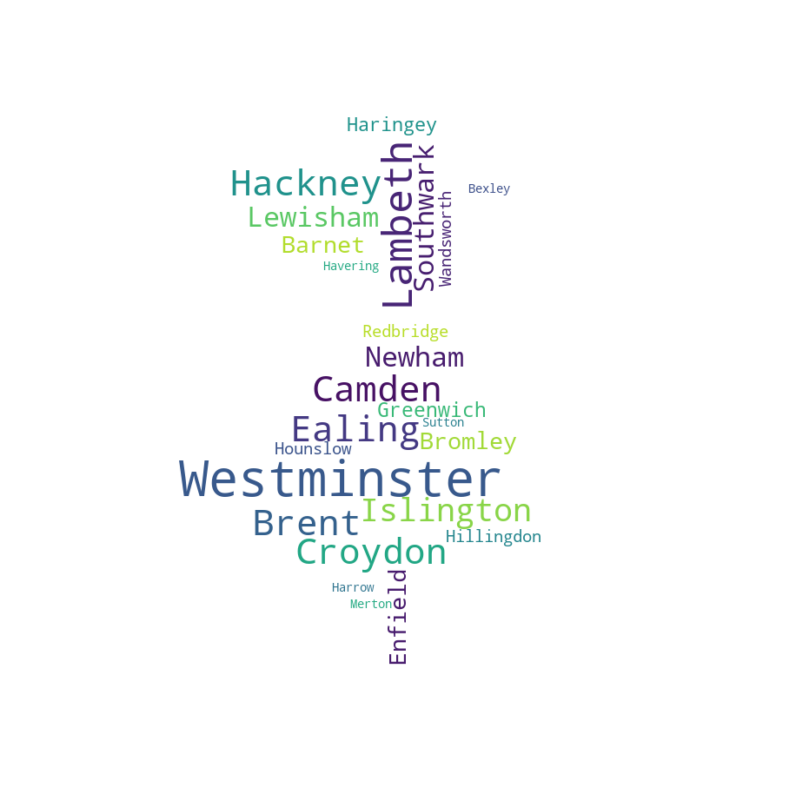

In [28]:
# create word cloud
wordcloud= WordCloud(background_color='white', mask= alice_mask).generate(word_string)

# menampilkan mask
fig= plt.figure()
fig.set_figwidth(14) #set width
fig.set_figheight(18) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Implementasi Folium

In [29]:
data

,lsoa_code,borough,major_category,value,year
0,E01001116,Croydon,Burglary,0,2016
1,E01001646,Greenwich,Violence Against the Person,0,2016
2,E01000677,Bromley,Violence Against the Person,0,2015
3,E01003774,Redbridge,Burglary,0,2016
4,E01004563,Wandsworth,Robbery,0,2008
...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,0,2015
13490600,E01002504,Hillingdon,Robbery,1,2015
13490601,E01004165,Sutton,Burglary,0,2011
13490602,E01001134,Croydon,Robbery,0,2011


In [30]:
# Latitude dan Longitude London
latitude= 51.509865
longitude= -0.118092

london_map= folium.Map(location=[latitude, longitude], zoom_start=15)
london_map

# Kesimpulan